![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [3]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
from PIL import Image
import csv
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

!pip install Keras
!pip install Keras-Applications
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip show keras-vggface

import tensorflow as tf
import keras
import keras_vggface
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_vggface.vggface import VGGFace

print(tf.__version__)
print(keras.__version__)
print(keras_vggface.__version__)

#from tensorflow import keras
#from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras.layers import Dense, Dropout, Input, Flatten 
#from tensorflow.keras.optimizers import RMSprop, Adam
#from tensorflow.keras.layers import LeakyReLU
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras import utils 
#from tensorflow.keras.initializers import he_normal
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.callbacks import ModelCheckpoint

     |████████████████████████████████| 51kB 2.6MB/s 
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-0ay5ecfz
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-0ay5ecfz
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=06a5df2bebe9988bd36ea071d8d1c28f1d725ab0ca8c07ac875225a0fd052ec4
  Stored in directory: /tmp/pip-ephem-wheel-cache-8gyf97f1/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface
Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, six, keras, scipy, h5py, pyyaml, pillow
Required-by: 
2.3.0
2.4.3
0.6


In [4]:
!pip install keras_vggface
#keras-vggface.__version__
#keras_vggface.__version__
#from keras_vggface.vggface import VGGFace
tf.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [6]:
#### Add your code here ####
project_path =""

folder_path = '/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/Copy of Aligned Face Dataset.zip (Unzipped Files)/'

!pwd
os.chdir("/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/Copy of Aligned Face Dataset.zip (Unzipped Files)")
project_path = !pwd
print(str(project_path))

/content
['/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/Copy of Aligned Face Dataset.zip (Unzipped Files)']


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [7]:
#### Add your code here ####

#from zipfile import ZipFile

#print(os.getcwd())

#with ZipFile(os.getcwd() + '/Aligned Face Dataset.zip', 'r') as z:
#    z.extractall()


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [8]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [9]:

def load_image(path):
    f_path = folder_path + path
    img = cv2.imread(f_path, 1)
    # OpenCV loads images with color channels in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

<class 'str'>
/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


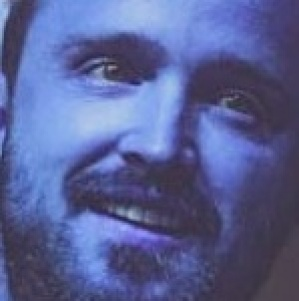

In [10]:
#### Add your code here ####

#path = '/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/Copy of Aligned Face Dataset.zip (Unzipped Files)'
path =  str('/PINS/') + str('pins_Aaron Paul/Aaron Paul0_262.jpg')
#/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/Copy of Aligned Face Dataset.zip (Unzipped Files)/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
print(type(path))
print(path)

img_1 = load_image(path)

cv2_imshow(img_1) 


### VGG Face model
- Here we are giving you the predefined model for VGG face

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()

    model.add(ZeroPadding2D((1,1),input_shape=(301,299,3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))   
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [12]:
#### Add your code here ####

from keras.engine import  Model
from keras_vggface.models import RESNET50, VGG16, SENET50
from keras.preprocessing import image
from keras_vggface import utils

#vgg16_model = tf.keras.applications.vgg16.VGG16(weights='/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/vgg_face_weights.h5', include_top=False, input_tensor=Input(shape=(224,224,3)))
#vggFace_model = VGGFace(weights='/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/vgg_face_weights.h5', include_top=False) #, input_tensor=Input(shape=(224,224,3)))
#vgg_model = VGGFace(model='vgg', include_top=False, input_shape=(224, 224, 3), weights='vggface' , pooling='avg')

#model = VGGFace()
model = vgg_face()    #include_top=True , weights = 'vggface')

# Load VGG Face model weights
os.chdir("/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/")

!pwd
model.load_weights('vgg_face_weights.h5')


/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection


In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 303, 301, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 301, 299, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 303, 301, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 301, 299, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 149, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 152, 151, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 149, 128)     7

In [14]:
#res = model.predict(img_1)
#print(np.argmax(res[0]))

#out = vgg_model.get_layer(layer_name).output
#vgg_model_new = Model(vgg_model.input, out)

#res = vggface_model.predict(img_1)
#print(np.argmax(res[0]))

print(img_1.shape)
img_2 = np.reshape(img_1, (-1, 301,299,3))
print(img_2.shape)

preds = model.predict(img_2)


(301, 299, 3)
(1, 301, 299, 3)


In [15]:
#for x in utils.decode_predictions(preds)[0]:
#    print(x)
#print('Predicted:', utils.decode_predictions(preds),3)

### Get vgg_face_descriptor

In [16]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model
print(metadata[0])
#img_path = '/content/drive/My Drive/Colab Notebooks/GL AIML Lab & Project/FaceDetection/Copy of Aligned Face Dataset.zip (Unzipped Files)/' 
img_path = metadata[0].image_path()
print(img_path)
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
(224, 224, 3)
(2622,)


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [18]:
embeddings = np.zeros((metadata.shape[0], 2622))
print(embeddings)
#print(metadata)

for i, m in enumerate(metadata):
  print(i)
  #print(m)
  img_path = metadata[i].image_path()
  #print(metadata[i].image_path())
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  #print(img.shape)
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))
  #print(embeddings[i])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
23

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [19]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

In [20]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    print(metadata[idx1].image_path())
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    print(metadata[idx2].image_path())
    plt.imshow(load_image(metadata[idx2].image_path()));    


PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
PINS/pins_Aaron Paul/Aaron Paul101_249.jpg
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
PINS/pins_Aaron Paul/Aaron Paul113_228.jpg
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
PINS/pins_Aaron Paul/Aaron Paul120_290.jpg
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
PINS/pins_Amanda Crew/Amanda Crew100.jpg
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
PINS/pins_Amaury Nolasco/Amaury Nolasco46.jpg


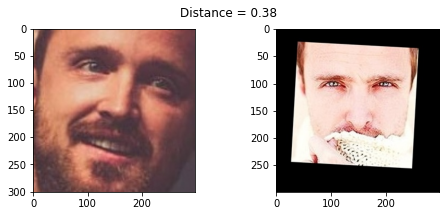

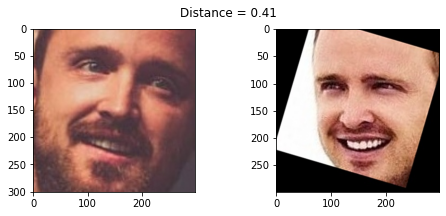

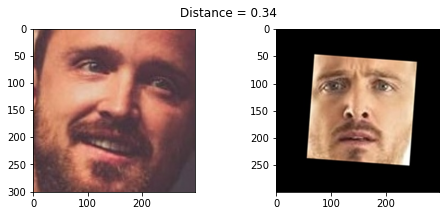

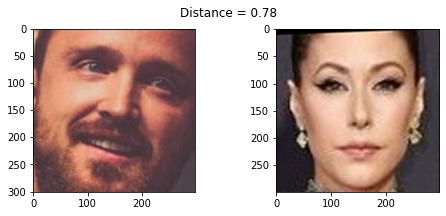

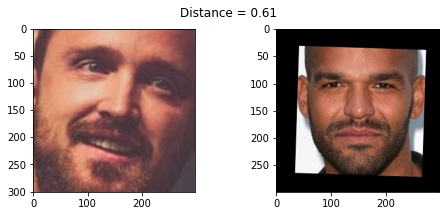

In [21]:
show_pair(2,3 )
show_pair(2, 5)
show_pair(2, 10)
show_pair(2, 180)
show_pair(2, 350)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [22]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]
#### Add your code here ####


### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)


In [27]:
#print(y_train)
#print(y_train.shape)
#print(y_test)
#print(y_test.shape)

[ 0  0  0 ... 23 23 23]
(2192,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 13 13 13 13 13 13 13 13 13 13
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16
 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18
 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 22 23 23 23
 23 23 23 23 23 23 23 23 23 23 23]
(275,)


### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [28]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()

# transform data
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

# transform data
X_test_scaled = scaler.fit_transform(X_test)
print(X_test_scaled)

[[ 2.34190994 -0.24139706 -1.47641756 ...  0.40047051 -0.20559766
   0.96871506]
 [ 1.98701377 -1.52318499 -1.47108425 ...  1.44006203 -0.16842728
  -2.09350405]
 [ 0.18216649 -0.60590669 -0.42185988 ...  0.85191251 -0.92784606
   0.18810692]
 ...
 [-1.40974069 -1.06983646 -0.07661206 ...  2.22807648  1.86547146
   1.25393729]
 [ 0.54931763  2.17193905  1.14614732 ...  0.56661041 -0.09840119
   1.63470892]
 [-1.03905832 -0.25651111 -0.42919339 ...  1.66107303  0.45836514
   0.52324267]]


### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [40]:
from sklearn.decomposition import PCA

#### Add your code here ####
pca = PCA(n_components=128)

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [41]:
from sklearn import svm
from sklearn.svm import SVC

#### Add your code here ####
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)

In [47]:
from sklearn.metrics import accuracy_score

print("Training Accuracy is " + str(clf.score(X_train_pca, y_train) * 100))
print("Test Accuracy is " + str(accuracy_score(y_pred, y_test) * 100))

Training Accuracy is 100.0
Test Accuracy is 98.9090909090909


In [49]:

for i, m in enumerate(metadata):
  if (y_pred[i] == y_test[i]):
    print("Correct Prediction - " + str(metadata[i]) + "-" + str(y_pred[i]) + "-" + str(y_test[i]))
  else:
    print("Wrong Prediction - " + str(metadata[i]) + "-" + str(y_pred[i]) + "-" + str(y_test[i]))

Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul101_248.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul101_247.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul0_262.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul101_249.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul103_217.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul113_228.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul114_271.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul116_240.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul117_213.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul119_219.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul120_290.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul124_221.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul126_291.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul129_259.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Pa

IndexError: ignored

In [50]:
print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  1  3  3  3  3  3  3  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 13 13 13 13 13 13 13 13 13 13
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16
 16 16 20 17 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18
 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20
 10 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 22 23 23 23
 23 23 23 23 23 23 23 23 23 23 23]


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

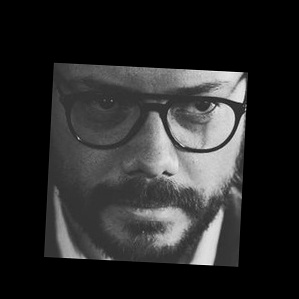

pins_Alvaro Morte


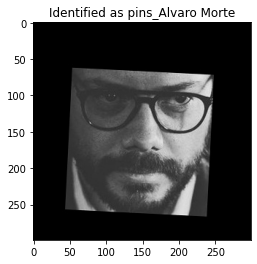

In [51]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
example_image = load_image(metadata[test_idx][example_idx].image_path())
cv2_imshow(example_image) 

example_identity = labelencoder.inverse_transform(y_pred)[example_idx]
print(example_identity)

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');